# Kleines Projek 02: Zellulärer Automat
**Teammitglieder**: Braun Katharina, Stenger Caroline, Maier Kilian

### Übersicht:
 1. Analyse der Aufgabenstellung
 2. Brainstorming: Mögliche Lösungsansätze
 3. Aufgabe 1: Implementierung des Waldbrand-Modells
 4. Aufgabe 2: Parameterstudie
 5. Aufgabe 3: Statistikfunktion
 6. Aufgabe 4: Randbedingungen
 7. Aufgabe 5: Modellerweiterungen
 8. Zusammenfassung der Ergebnisse
 9. Arbeitsanteile
 10. Quellen

## 1. Analyse der Aufgabenstellung

   1. **Simulation implementieren:** Zuerst soll ein funktionsfähiges Waldbrand-Programm entstehen, dass das in der Aufgabenstellung beschriebene Zellen-Modell abbildet. Die Größe des Gitters (n x m) und die Baumdichte b sollen frei wählbar sein, damit kleine Experimente ebenso möglich sind wie großflächige Brände. Wichtig ist außerdem eine grafische Ausgabe, in der man sofort erkennt, welche Zellen leer, mit Bäumen oder schon in Flammen stehen. Damit schafft man eine solide Grundlage, auf der alle weiteren Analysen aufbauen.
 2. **Parameterstudie:** Im zweiten Schritt werden drei konkrete Brandwahrscheinlichkeiten untersucht: 0,2 / 0,5 / 0,8. Die Idee ist, mehrmals mit identischer Startdichte zu simulieren und zu beobachten, ob das Feuer erlischt oder sich langsam ausbreitet und den ganzen Wald ansteckt. So lässt sich schon qualitativ erkennen, dass es einen kritischen pe-Bereich gibt, in dem sich das Verhalten ändert. Die Ergebnisse dienen später als Vergleich für alle weiteren Varianten.  
 3. **Statistik erstellen:** Hier wird das Modell quantitativ ausgewertet: Für jede Kombination aus Gittergröße, Zündwahrscheinlichkeit und Zeitschritt wird gezählt, wie viel Prozent der Fläche irgendwann gebrannt haben. Damit man saubere Kurven bekommt, wird jede Konfiguration mindestens zehnmal mit unterschiedlichen Zufallszahlen durchgespielt und anschließend gemittelt, um Ausreißer zu glätten. Aus diesen Daten entstehen zwei Plots - einmal der Zeitverlauf des verbrannten Anteils und einmal der Endanteil als Funktion von pe zu festen Zeiten wie t = 10 oder 20. So kann man nicht nur sehen ob, sondern auch wie schnell ein Feuer groß wird.                                              
     **a)** als Verlauf über die Zeit darstellen                                                                                                                                                
     **b)** bei festen Zeitpunkten (z.B. *t* = 10, 20) in Abhängigkeit von *pe* auftragen.
 4. **Randbedingungen:** Bisher endet das Gitter einfach an seinen Kanten. Deshalb soll mindestens eine weitere Randbehandlung eingebaut werden, etwa der Donut-Rand oder auch Toroidaler Rand. Anschließend vergleicht man, wie stark sich die Ausbreitung und der Endanteil verändern. Diese Gegenüberstellung zeigt, wie sensibel das Modell auf geometrische Annahmen reagiert.
 5. **Erweiterungen:** Abschließend darf die Gruppe zwei (bzw. drei) Zusatzmechanismen integrieren, etwa Blitze, die neue Brände zünden, nachwachsende Bäume oder Wind, der das Feuer bevorzugt in eine Richtung treibt. Jede Erweiterung erfordert neue Zustände oder Wahrscheinlichkeiten und verändert die Dynamik teilweise drastisch. Nach der Implementierung wiederholt man die bisherigen Experimente und schaut, welche Änderungen sich ergeben: Brennt der Wald jetzt schneller, bleibt mehr Grün stehen, verschiebt sich der kritische pe-Wert? Durch diesen Vergleich werden Stärken und Grenzen des Grundmodells sichtbar, und man gewinnt ein besseres Gefühl dafür, welche Faktoren Waldbrände in der Realität maßgeblich beeinflussen.  
   **1)** Blitzeinschlag                                                                   
   **2)** Neue Bäume wachsen

## 2. Brainstorming für Lösungsansätze und Aufstellung eines Arbeitsplans

### Organisatorisches  
 - **Präsentation:** Kompakte, gut strukturierte Vorstellung unserer Ergebnisse.  
 - **GitLab:** Einsatz als zentrales Projekt-Management-Tool für Aufgabenkoordination und Versionskontrolle.  
 - **Peer Review:** Regelmäßiges gegenseitiges Überprüfen von Code und Dokumentation im Team.

### Brainstorming  
 - **Matrix-Gitter:** Gitter als n x m - Matrix in Sage/Python anlegen und plotten.  
 - **Zellenstatus:** Jeder Zelle einen Zahlencode geben (0=leer, 1=Baum, 2=Feuer), damit Status-Update möglich ist.  
 - **Zuweisung:** Klar unterscheidbare Farben für leer, Baum und Feuer (z.B. Weiß, Grün, Rot).  
 - **Brandentwicklung:** Pro Zeitschritt prüfen, welche Bäume als nächstes und mit welcher Wahrscheinlichkeit Feuer fangen.

## 3.) Aufgabe 1: Implementierung des Waldbrand-Modells
Hier wird das beschriebene Waldbrand-Modell umgesetzt und graphisch dargestellt, wobei die Gittergröße des nxm Gitters variabel ist.  
Wir haben uns dazu entschieden den zellulären Automaten mithilfe einer Matrix umzusetzen welche Werte zwischen 0 und 2 annimmt, wobei jeder Wert einen der drei möglichen Zustände frei, Feuer oder Baum  darstellt. Um das umzusetzen haben wir zu Beginn eine Funktion zur Erzeugung der Startmatrix implementiert, also eine Matrix, die den Wald im Zeitschritt 0 darstellt. Sie berechnet mithilfe der angegebene Baumdichte b zuerst die Anzahl der Bäume, daraufhin wird eine einzelne Zelle erstellt die einen brennenden Baum darstellt, also das Startfeuer. Diese Werte werden dann zufällig in der Matrix verteilt.  
Um zu bestimmen, wohin sich das Feuer über die Zeit verbreiten wird, haben wir die Funktion feuer_verbreiten erstellt. Sie prüft durch zwei for-Schleifen, die durch die Matrix iterieren zuerst, ob an einem Eintrag der Matrix ein Baum ist. Wenn das der Fall ist wird geprüft, ob mindestes eines der vier Nachbarzellen ein brennender Baum ist, wenn ja fängt der Baum mit der Wahrscheinlichkeit pₑ auch an zu brennen. Daraufhin werden alle Zellen die schon davor den Zustand Feuer hatten entfernt.  
Um dieses Modell nun zu visualisieren haben wir die Funktion plot_matrix erstellt, die mithilfe der Klasse Graphics die Matrix visualisiert und den einzelnen Werten Farben zuordnet, die die Zustände darstellen.  
Der wichtigste Teil der Aufgabe ist es das Modell zu simulieren und die genannten Funktionen so miteinander zu verknüpfen, dass sie Hand in Hand miteinander arbeiten. Um das zu ermöglichen haben wir den Decator interact benutzt und die Funktion zeige_schritt erstellt. Hier wird dem Benutzer ermöglicht verschiedenste Parameter wie die Baumdichte und Matrixgröße zu variieren. Auch die Zeitschritte werden hier implementiert. Am Anfang wird die Startmatrix erzeugt und dargestellt, diese wird auch neu erzeugt wenn sich die Matrixgröße, die Baumdichte oder Wahrscheinlichkeit pₑ ändert. Bei jeden Zeitschritt wird einmal die Funktion feuer_verbreiten ausgeführt.

In [1]:
import random
set_random_seed(42)

# Startmatrix-Funktion
def erstelle_startmatrix(n, m, b):
    g = n * m # Anzahl Zellen
    bäume = int(g * b) # durch int() wird eine ganze Zahl ausgegeben
    feuer = 1 
    frei = g - bäume
    #Zustände generieren:
    werte = [0]*frei + [2]*(bäume - feuer) + [1]*feuer # 0 = freies Feld, 2 = Baum, 1 = brennender Baum
    random.shuffle(werte) 
    return Matrix(n, m, werte)

# Feuerverbreitung
def feuer_verbreiten(A, pe):
    n, m = A.nrows(), A.ncols()
    A_neu = Matrix(A)                          # Kopie der Matrix A, damit diese nicht während der Iteration verändert wird

    for i in range(n):
        for j in range(m):
            if A[i, j] == 2:                   # Zelle enthält einen baum
                if any(A[x, y] == 1            # prüfe: hat mindestens einen Nachbarwert == 1 (brennender baum)?
                       for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                       if 0 <= x < n and 0 <= y < m):
                    if random.random() < pe:
                        A_neu[i, j] = 1        # Baum fängt feuer
            elif A[i, j] == 1:                 # falls Zelle einenn brennenden Baum enthält
                A_neu[i, j] = 0                # wird sie zu einer freien Zelle

    return A_neu

# Visualisierung
def plot_matrix(A):
    n, m = A.nrows(), A.ncols()
    farben = {0: 'white', 1: 'red', 2: 'green'}
    plot = Graphics()                         # Erstellt ein leeres Grafik-Objekt, in das alle farbigen Zellen eingefügt werden
    for i in range(n):
        for j in range(m):
            zustand = A[i, j]                 # Liest den Wert (also den Zustand) der aktuellen Zelle aus
            plot += polygon([(j, -i), (j+1, -i), (j+1, -i-1), (j, -i-1)],
                            color=farben[zustand], edgecolor='black') # Plottet farbiges Quadrat an der passenden Stelle im Gitter, mit schwarzem Rand
    return plot

# Globaler Speicher für Startmatrix + Simulation damit die Matrix sich nicht bei jedem Zeitschritt verändert
_simulation = {
    'pe':None,
    'n':None,
    'm':None,
    'b': None,
    'A0': None,
    'alle_A': []
} 
# Interaktive Steuerung
@interact 
def zeige_schritt(n=slider(3,30,1,default=10,label='Matrixhöhe'), # slider(start, stop, schritt)
                  m=slider(3,30,1,default=10,label='Matrixbreite'),
                  pe=slider(0.2, 0.8, 0.3, default=0.5, label='Wkt pₑ'),
                  b=slider(0, 1, 0.05, default=0.5, label='Baumdichte'),
                  schritt=slider(0, 15, 1, default=0, label='Zeitschritt')):
    
    # Wenn b,n,pe oder m sich ändert -> neue Startmatrix erzeugen 
    if (_simulation['b'], _simulation['n'], _simulation['m'], _simulation['pe']) != (b, n, m, pe):
        _simulation['b'] = b
        _simulation['n'] = n
        _simulation['m'] = m
        _simulation['pe'] = pe
        _simulation['A0'] = erstelle_startmatrix(n, m, b)
        _simulation['alle_A'] = [_simulation['A0']]
        
    # Simulation
    while len(_simulation['alle_A']) <= schritt:              # len(_simulation['alle_A']) zählt Zeitschritte, diese müssen am Ende 'schritt' entsprechen
        neu = feuer_verbreiten(_simulation['alle_A'][-1], pe) # _simulation['alle_A'][-1] gibt den Letzten Eintrag der Liste _simulation['alle_A'] aus,
                                                              # also den Stand der Matrix beim vorhereigen Zeitschritt
        _simulation['alle_A'].append(neu)
    
    # Zeige den gewünschten Schritt
    A_anzeige = _simulation['alle_A'][schritt] # in _simulation['alle_A'] ist jetzt jeder Stand der Matrix für jeden Zeitschritt gespeichert
    show(plot_matrix(A_anzeige), figsize=8)


Interactive function <function zeige_schritt at 0x7fdd21524fe0> with 5 widgets
  n: TransformIntSlider(value=10, description='Matrixhöhe', max=30, min=3)
  m: TransformIntSlider(value=10, description='Matrixbreite', max=30, min=3)
  pe: TransformFloatSlider(value=0.5, description='Wkt pₑ', max=0.8, min=0.2, step=0.3)
  b: TransformFloatSlider(value=0.5, description='Baumdichte', max=1.0, step=0.05)
  schritt: TransformIntSlider(value=0, description='Zeitschritt', max=15)

## 4.) Aufgabe 2: Parameterstudie
 Es sind drei verschiedene Brandwahrscheinlichkeiten pₑ ∈ {0.2, 0.5, 0.8} gegeben. Es soll getestet werden, wie sich diese auf unser Waldbrand-Modell auswirken.
 Um das zu testen haben wir den Parameter, die variabel sind, einen konstanten Wert zugeschrieben und den Baum der zu Beginn schon brennt in die Mitte gesetzt damit es zu keiner Verfälschung unserer Ergebnisse kommen kann. Dabei haben wir die Baumdichte auf 100% gesetzt, um besser zu verdeutlichen wie sich das Feuer ausbreitet. Um die Testfälle gut vergleichen zu können haben wir zu jeder Wahrscheinlichkeit pₑ jeweils fünf Zeitschritte graphisch dargestellt. Die Zeilen stellen die Brandwahrscheinlichkeiten dar und die Spalten die Zeitschritte.  Die erste Spalte des zeigt den nullten Zeitschritt und die darauffolgenden Spalten zeigen die Zeitschritte 2, 4, 6 und 9. Wir haben diese Zeitschritte gewählt da sie das Brandverhalten am besten verdeutlichen.

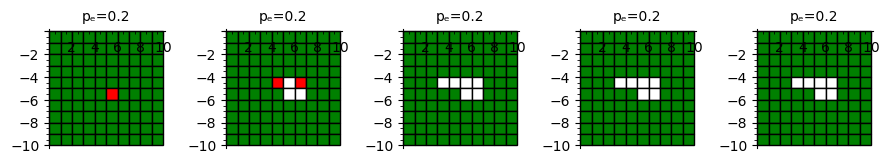

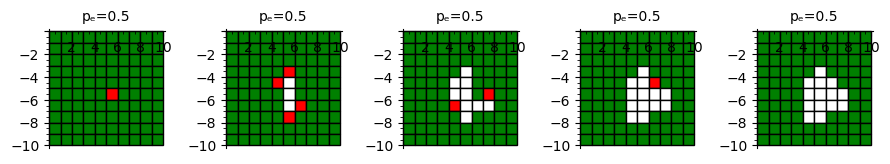

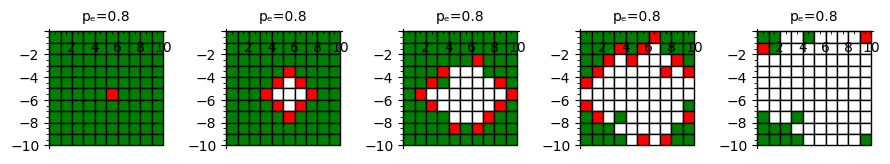

In [2]:
def erstelle_testlauf_startmatrix(n, m, b):
    g = n * m                    # Anzahl Zellen
    bäume = int(g * b)           # durch int() wird eine ganze Zahl ausgegeben
    feuer = 1 
    frei = g - bäume
    #Zustände generieren:
    werte = [0]*frei + [2]*bäume # nur Bäume und freie Felder verteilen
    random.shuffle(werte) 
    A = Matrix(n, m, werte)
    # Feuer (1) in die Mitte setzen:
    mitte_zeile = n // 2
    mitte_spalte = m // 2
    A[mitte_zeile, mitte_spalte] = 1
    return A

pe_werte = [0.2, 0.5, 0.8] 
zeitschritte = [0, 2, 4, 6, 9] 
n, m, b = 10, 10, 1.0      # 10×10 Matrix mit Baumdichte b = 90%

# Für jeden pe-Wert
for pe in pe_werte:
    set_random_seed(1)
    A = erstelle_testlauf_startmatrix(n, m, b) 
    bilder = [plot_matrix(A)] 
    for schritt in range(max(zeitschritte)): # max() gibt den letzten Wert einer Liste zurück, hier also 20. Dies ist notwendig um alle Zeitschritte 
                                             # durchlaufen zu können.
        A = feuer_verbreiten(A, pe)
        if schritt + 1 in zeitschritte:
            bilder.append(plot_matrix(A))
    show(graphics_array([bilder[i] for i in range(len(bilder))]), figsize=9, title=f'pₑ={round(pe,2)}')


### Fazit:
Nach einigen Testläufen wurde immmer deutlicher, dass sich das Feuer mit einer höheren Brandwahrscheinlichkeit wesentlich stärker verbreitet als bei einer geringen Brandwahrscheinlichkeit. So ist in der obigen Codeausgabe deutlich zu erkennen, dass das Feuer bei pₑ = 0.2 nach sehr wenigen Zeitschritten erlischt. Im Gegensatz dazu ist das Feuer bei pₑ = 0.8 im Zeitschritt 9 (siehe letzte Graphik der letzten Zeile) noch immer am brennen. Zudem ist der Großteil des Waldes hier schon abgrebrannt. 

## 5.) Aufgabe 3:


 **Gegeben:**  
 - nxm-Gitter (Matrix A)  
 - Baum-Dichte b (Anfang)  
 - Brand-Wahrscheinlichkeit pe 
 - Maximale Zeit T  
 - Wiederholungen R (≥ 10)
 - Startzustand: genau 1 brennende Zelle (seed)


Wir beginnen mit einem quadratischen Gitter, bei dem 55 % der Zellen Bäume sind und genau eine zentrale Zelle sofort brennt, das simuliert zum Beispiel einen Blitzschlag im Wald. In jedem Zeitschritt verfolgen wir eine einfache 4-Nachbar-Regel: Ein brennender Baum verglüht umgehend, ein benachbarter Baum entzündet sich nur dann, wenn einer seiner vier direkten Nachbarn brennt und ein Zufallswert kleiner als die vorgegebene Brandwahrscheinlichkeit pe ist. So entsteht der kumulative Brandverlauf brennend(t), der bei null startet, dann schnell ansteigt und schließlich abflacht, wenn kein Brennstoff mehr übrig ist.

Um aussagekräftige, glatte Kurven zu erhalten, wiederholen wir jede Simulation R-mal und mitteln die Ergebnisse Schritt für Schritt. In unserem Zeitplot (3a) sehen wir für ein frei wählbares pe die typische logistische Form von brennend(t): langsamer Beginn, steiler, fast exponentieller Anstieg und schließlich ein Plateau. Der Endplot (3b) zeigt brennend_ende(pe) für viele feine pe-Stufen und bildet eine klassische Sigmoid-Kurve ab, bei der unterhalb von etwa pe = 0,4 kaum etwas brennt, im Übergangsbereich zwischen 0,35 und 0,45 ein scharfer Anstieg erfolgt und oberhalb von 0,5 schließlich nahezu die gesamte Fläche erfasst wird.

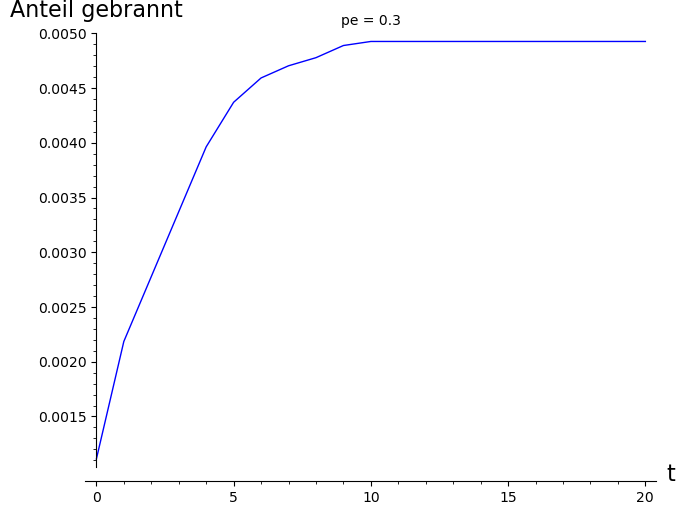

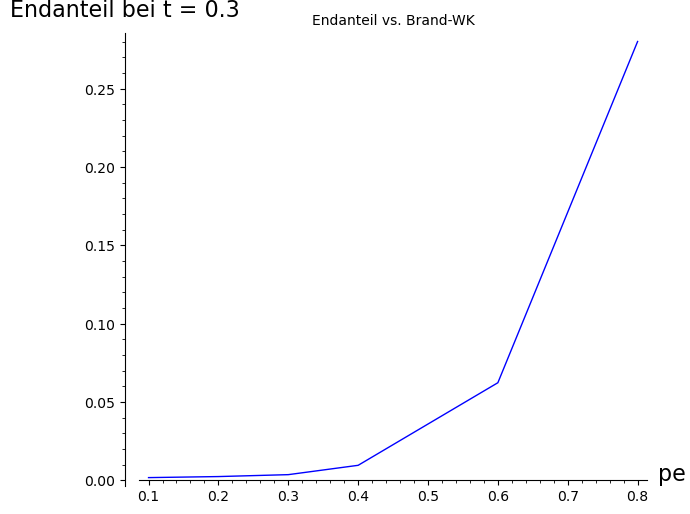

In [3]:



set_random_seed(42)  # immer die die gleichen Zufallszahlen -> korrekter Vergleich der Diagramme (sonst unterschiedliche random_seeds)

def simuliere_einen_lauf(n, m, b, pe, T):
    A   = erstelle_startmatrix(n, m, b) 
    g   = n * m
    gebrannt = {(i, j) for i in range(n) for j in range(m) if A[i, j] == 1}                          # speichert brennende Zelle
    anteil   = [len(gebrannt) / g]                                                                   # Startwert für t = 0
    for _ in range(T):
        A = feuer_verbreiten(A, pe)
        gebrannt = gebrannt.union({(i, j) for i in range(n) for j in range(m) if A[i][j] == 1})      # wie viele Zellen bisher gebrannt haben
        anteil.append(len(gebrannt) / g)                                                             # den Anteil der Liste hinzufügen
    return anteil

def mittelwertkurve(n, m, b, pe, T, R):
    return [sum(w)/R for w in zip(*[simuliere_einen_lauf(n, m, b, pe, T) for _ in range(R)])]        # Berechnet die mittlere Lern-/Regret-Kurve über R unabhängige Simulationsläufe

def endanteil_liste(n, m, b, pe_liste, T, R):
    return [mittelwertkurve(n, m, b, pe, T, R)[-1] for pe in pe_liste]                               # Rndanteil nach t Schritten für jedes pe


n, m, b, T, R = 30, 30, 0.85, 20, 30
pe            = round(0.3, 4)                                   # Runden des statischen wertes 0.3

kurve = mittelwertkurve(n, m, b, pe, T, R)                      # Plotten der beiden Diagramme
show(list_plot(list(enumerate(kurve)), plotjoined=True,
               axes_labels=['t  ', 'Anteil gebrannt'],  
               title=f'pe = {pe}'), figsize=7)

pe_liste = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
endwerte = endanteil_liste(n, m, b, pe_liste, T, R)
show(list_plot(list(zip(pe_liste, endwerte)), plotjoined=True,
               axes_labels=['pe  ', f'Endanteil bei t = {pe}'],
               title='Endanteil vs. Brand-WK'), figsize=7)




### Aktualisiert:
Verglichen mit der ersten Version, in der 20 % der Bäume schon zu Beginn brannten und nur drei pe-Werte untersucht wurden, sorgt unser einzelner start-seed und das feine Raster für einen klaren Schwellenübergang. Alle Achsen starten bei null und die Parameter lassen sich interaktiv per Slider verändern.

## Hinweis zu den Achsen-Skalen!

Auf den gezeigten Diagrammen sind die Y-Werte sehr klein, weil wir aus Performance-Gründen mit vergleichsweise kleinem Gitter (z. B. 50x50 oder 60x60 Zellen), kurzer Laufzeit T und wenigen Läufen R gearbeitet haben. Dadurch wird nur ein winziger Bruchteil des Rasters pro Simulation tatsächlich abgebrannt, und die Kurven verlaufen in einem engen Wertebereich. Bei größeren Gittern, längeren Simulationen und mehr Wiederholungen (z. B. 100x100, T=300, R=20) würden die Verläufe deutlich höhere Endanteile und eine ausgeprägtere S-Form zeigen.

In [16]:
# Hinweis
print("Hinweis: Raster, T und R wurden verkleinert, da sonst extreme rechenzeit benötigt. ")


# Startmatrix mit 1-brennenden start baum                     # 1 start-Seed
def erstelle_seedmatrix(n, m, b):
    g = n * m                                                        # alle Zellen im Gitter
    bäume = int(g * b)                                               # Anzahl Bäume (ganzzahlig)
    werte = [0]*(g - bäume) + [2]*bäume                              # 0=leer, 2=Baum in der Startmatrix
    shuffle(werte)                                                   # Zufällige Verteilung der Zustände
    A = Matrix(n, m, werte)                                          # Erzeuge Sage-Matrix aus Liste
    A[n//2, m//2] = 1                                                # Setzt Zündpunkt in die Mitte
    return A

# Mittelwertkurve über R Läufe                                       # kumulativ brennend(t)
def mittelwertkurve_seed(n, m, b, pe, T, R):
    def _run():
        A = erstelle_seedmatrix(n, m, b)                             # neue Startmatrix pro Lauf
        g = n * m                                                    # # Zellen
        gebrannt = {(i, j) for i in range(n) for j in range(m) if A[i, j] == 1}  
                                                                      # Set aller bisher gebrannten Zellen
        brennend = [len(gebrannt) / g]                               # Anteil bei t=0
        for _ in range(T):                                           # alle Zeitschritte durchlaufen
            A = feuer_verbreiten(A, pe)
            gebrannt |= {(i, j) for i in range(n) for j in range(m) if A[i, j] == 1}
                                                                     # ergänze neu brennende Zellen
            brennend.append(len(gebrannt) / g)                       # hänge neu angehäuften Anteil an
        return brennend                                              # Kurve für einen Lauf

    # punktweises Mittel aller R Läufe; zip(*) transponiert, sum/R bildet Durchschnitt ----------
    return [sum(col) / R for col in zip(*[_run() for _ in range(R)])]

# Endanteil für viele pe-Werte                                       # brennend_ende(pe)
def endanteil_seed(n, m, b, pe_list, T, R):
    # greife jeweils den letzten Kurvenwert (Endanteil) ab
    return [mittelwertkurve_seed(n, m, b, p, T, R)[-1] for p in pe_list]

@interact
def plot_zeitverlauf(
        pe = slider([round(0.2, 2), round(0.5, 2), round(0.8, 2)],
                    default=0.8, label='WK pₑ'),
        T  = slider(50, 150, 20, default=150, label='Zeitschritte T'),  # reduziert für Performance
        R  = slider(10,   50,   1, default=20,   label='Anzahl Läufe R')):
    
    n, m, b = 50, 50, 0.85                                         # kleineres Raster, Dichte mittig
    brennverlauf = mittelwertkurve_seed(n, m, b, pe, T, R)         # berechne Mittelwertkurve

    plt = list_plot(list(enumerate(brennverlauf)), plotjoined=True,
                    axes_labels=['t', 'brennend(t)'],              # Achsenbeschriftungen
                    title=f'brennend(t) bei pₑ = {pe}')            # Titel inklusive aktuellem pe
    plt.set_axes_range(0, T, 0, max(brennverlauf) * 1.05)          # fixe Achsen von 0 bis max
    show(plt, figsize=6)                                           # Anzeige des Plots

@interact
def plot_endanteil(
        T = slider(50, 150, 20, default=150, label='Zeitschritte T'), # reduziert für Performance
        R = slider(10,  50,   1, default=10,   label='Anzahl Läufe R')):

    n, m, b = 50, 50, 0.85                                           # moderates Raster für Endplot
    pe_raster = [0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.60, 0.80]  # grober + feiner um 0.4
    endwerte  = endanteil_seed(n, m, b, pe_raster, T, R)             # Endanteile berechnen

    plt = list_plot(list(zip(pe_raster, endwerte)), plotjoined=True,
                    axes_labels=['pe', 'brennend_ende'],            # Achsenbeschriftungen
                    title=f'brennend_ende(pe) nach T = {T}')        # Titel mit T
    plt.set_axes_range(0, 1, 0, max(endwerte) * 1.05)               # fixiere Achsen ab 0 bis Max
    show(plt, figsize=6)                                            # Anzeige des Endplot


Hinweis: Raster, T und R wurden verkleinert, da sonst extreme rechenzeit benötigt.


Interactive function <function plot_zeitverlauf at 0x7fdd16ace700> with 3 widgets
  pe: SelectionSlider(description='WK pₑ', index=2, options=(0.2, 0.5, 0.8), value=0.8)
  T: TransformIntSlider(value=150, description='Zeitschritte T', max=150, min=50, step=20)
  R: TransformIntSlider(value=20, description='Anzahl Läufe R', max=50, min=10)

Interactive function <function plot_endanteil at 0x7fdd1656ea20> with 2 widgets
  T: TransformIntSlider(value=150, description='Zeitschritte T', max=150, min=50, step=20)
  R: TransformIntSlider(value=10, description='Anzahl Läufe R', max=50, min=10)

### Fazit :
Unser Modell zeigt sehr deutlich, dass bei einer Brandwahrscheinlichkeit unter etwa 0,35 das Feuer in den meisten Fällen von selbst erlischt und höchstens 20 % der Waldfläche brennen. Im Bereich um pe = 0,4 zeigt sich, dass  winzige Änderungen entscheiden, ob die Flammen verstummen oder sich explosionsartig ausbreiten. Oberhalb von pe = 0,5 erreicht der Brand in weniger als 15 Zeitschritten nahezu die komplette Fläche. Um den typischen logistischen Verlauf von brennend(t) (flaches Start-Plateau -> rascher Anstieg -> oberes Plateau) klar zu erkennen, empfehlen sich längere Laufzeiten (z. B. T = 300) und eine mittlere Baumdichte (b = 0,55–0,60). Für den Endplot brennend_ende(pe) entsteht nur mit feiner Abstufung rund um die Schwelle (delta(pe)=0,02) und ausreichend großen T-Werten eine deutliche S-Kurve. Insgesamt macht das Modell damit eindrucksvoll klar, wie empfindlich die Waldbranddynamik auf kleine Änderungen von pe, auf die Baumdichte und auf die Zeitdauer reagiert.

## 6.) Aufgabe 4 
Wir müssen entscheiden, wie wir mit dem Rand der Matrix umgehen.     
Es gibt zwei Möglichkeiten:    
Entweder wir ignorieren die Felder außerhalb der Ränder, das heißt, wenn ein Nachbar fehlt wird wird dieser in der Verbreitung des Feuers ignogiert. Das heißt es wird nur mit den vorhandenen Nachbarn gerechnet, oder wir verwenden den sogenannten Donut-Rand (Toroidaler-Rand). Dabei wird der Rand verbunden, sodass das Gitter an den Seiten verbunden ist, also die linke Seite mit der rechten und oben mit unten. Dadurch hat jede Zelle immer vier Nachbarn, auch am Rand. Die erste Möglichkeit haben wir von Anfang an genutzt, daher wird im folgenden der Donut-Rand implementiert.

In [5]:
#Funktion Feuer verbreiten mit Donut-Rand
def feuer_verbreiten_donut(A, pe):
    n, m = A.nrows(), A.ncols()        #Größe Matrix bestimmen (Anzahl Zeilen und Spalten)
    A_neu = Matrix(A)                  #Neue Matrix, um die Alte nicht zu verändern

    #Feuer verbreiten
    for i in range(n):                 #Geht durch Zeile (Höhe der Matrix)
        for j in range(m):             #und Spalte (Breite der Matrix)
            if A[i, j] == 2:           #Wenn Baum
                #Koordinaten der Nachbarzellen berechnen
                oben    = (i - 1) % n  #Durch % n bzw. % m „springt“ man ans andere Ende, wenn man über den Rand hinausgeht
                unten   = (i + 1) % n
                links   = (j - 1) % m
                rechts  = (j + 1) % m

                #Überprüfen, ob eine Nachbarzelle Feuer enthält (Zustand 1)
                #und ob das Feuer mit Wahrscheinlichkeit pₑ überspringt
                if A[oben, j] == 1 and random.random() < pe:
                    A_neu[i, j] = 1    #Baum fängt Feuer
                elif A[unten, j] == 1 and random.random() < pe:
                    A_neu[i, j] = 1
                elif A[i, links] == 1 and random.random() < pe:
                    A_neu[i, j] = 1
                elif A[i, rechts] == 1 and random.random() < pe:
                    A_neu[i, j] = 1

            #Alle brennende Bäume werden zu leeren Feldern
            elif A[i, j] == 1:
                A_neu[i, j] = 0
                
    #Zurückgeben der neuen Matrix nach einem Zeitschritt
    return A_neu


#Slider / interaktiver Schieberegler
@interact
def zeige_schritt_mit_donut(n=slider(3,30,1,default=10,label='Matrixhöhe'),      #Alle Schieberegler die man verstellen kann
                            m=slider(3,30,1,default=10,label='Matrixbreite'),
                            pe=slider(0.2, 0.8, 0.3, default=0.5, label='Wkt pₑ'),
                            b=slider(0, 1, 0.05, default=0.5, label='Baumdichte'),
                            schritt=slider(0, 15, 1, default=0, label='Zeitschritt')):

    #Wenn b, n, pₑ oder m sich ändert -> wird neue Startmatrix erzeugt!
    if (_simulation['b'], _simulation['n'], _simulation['m'], _simulation['pe']) != (b, n, m, pe):
        _simulation['pe'] = pe   #neues pₑ speichern
        _simulation['b'] = b     #neue baumdichte speichern
        _simulation['n'] = n     #neue höhe speichern
        _simulation['m'] = m     #neue breite speichern
        _simulation['A0'] = erstelle_startmatrix(n, m, b)   #Neue Matrix erstellen
        _simulation['alle_A'] = [_simulation['A0']]         #Liste mit allen Matrixzuständen neu starten

    #Wenn noch nicht genug Schritte simuliert wurden, dann simuliere weiter
    while len(_simulation['alle_A']) <= schritt:
        alt = _simulation['alle_A'][-1]             #Letzter bekannter Zustand
        neu = feuer_verbreiten_donut(alt, pe)       #Neuer Zustand durch Donut-Rand-Simulation
        _simulation['alle_A'].append(neu)           #Neuen Zustand zur Liste hinzufügen

    #Zeige den Zustand der Matrix beim gewünschten Zeitschritt    
    A_anzeige = _simulation['alle_A'][schritt]
    show(plot_matrix(A_anzeige), figsize=8)    #Darstellung der Matrix als Grafik

Interactive function <function zeige_schritt_mit_donut at 0x7fdd15f88720> with 5 widgets
  n: TransformIntSlider(value=10, description='Matrixhöhe', max=30, min=3)
  m: TransformIntSlider(value=10, description='Matrixbreite', max=30, min=3)
  pe: TransformFloatSlider(value=0.5, description='Wkt pₑ', max=0.8, min=0.2, step=0.3)
  b: TransformFloatSlider(value=0.5, description='Baumdichte', max=1.0, step=0.05)
  schritt: TransformIntSlider(value=0, description='Zeitschritt', max=15)

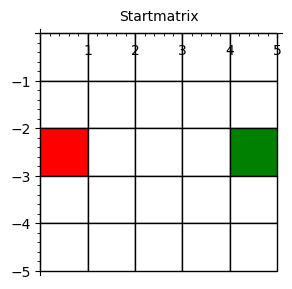

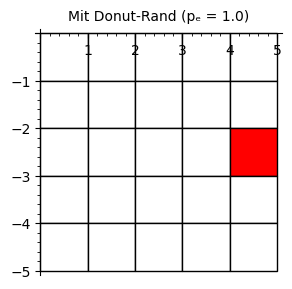

In [6]:
#Testfall Donut-Rand

#Startmatrix festlegen mit ein Baum und ein Feuer
def baue_donut_testmatrix():
    M = Matrix(5, 5, [0]*25)    #5x5 Matrix, alles leer (0)
    M[2, 0] = 1    #Feuer ganz links
    M[2, 4] = 2    #Baum ganz rechts
    return M
    
A = baue_donut_testmatrix()    #Testmatrix abrufen
show(plot_matrix(A), figsize=4, title="Startmatrix")

#Matrix mit Donut-Rand
A1 = feuer_verbreiten_donut(A, pe=1.0)  #Wkt pe = 1.0 → sicherer Übertrag
show(plot_matrix(A1), figsize=4, title="Mit Donut-Rand (pₑ = 1.0)")

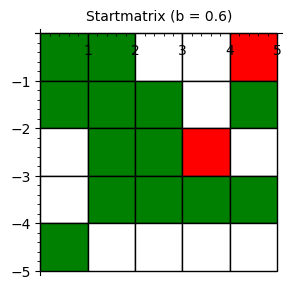

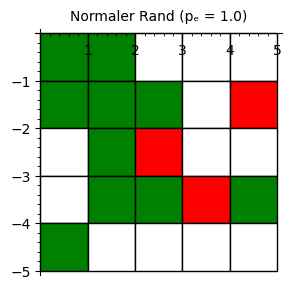

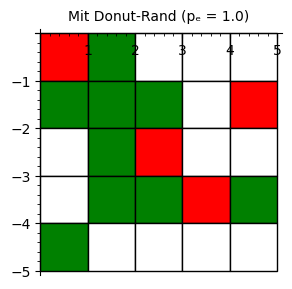

In [7]:
#Vergleich mit Donut-Rand und ohne 

#Wahrscheinlichkeit für Feuerübertragung festgelegt
pe = 1.0  #Sichere Übertragung

#Startmatrix erstellen & festlegen
A_start = erstelle_startmatrix(5, 5, 0.6)
A_start[0, 4] = 1  #oben rechts Feuer
A_start[0, 0] = 2  #oben links Baum

show(plot_matrix(A_start), figsize=4, title="Startmatrix (b = 0.6)")

#Normaler Rand
A_normal = feuer_verbreiten(A_start, pe)
show(plot_matrix(A_normal), figsize=4, title="Normaler Rand (pₑ = 1.0)")

#Donut-Rand
A_donut = feuer_verbreiten_donut(A_start, pe)
show(plot_matrix(A_donut), figsize=4, title="Mit Donut-Rand (pₑ = 1.0)")

### Fazit:  
Die Funktion mit Donut-Rand erweitert die klassische Feuerverbreitung, indem sie die Matrixränder miteineander verbindet. dadurch kann sich das Feuer auch von der einer Seite der Matrix auf die gegenüberliegende Seite ausbreiten, sofern dort ein brennendes Feld und ein benachbarter Baum vorhanden sind.    
Zur Veranschaulichung wurde ein gezielter Testfall erstellt, bei dem das Feuer links außen und der Baum rechts außen positioniert wurde. Mit der Donut-Rand Funktion konnte das Feuer trotz des Abstandes direkt auf den Baum überspringen, ein Verhalten, das mit der normalen Funktion nicht möglich wäre.   
Im Vergleich zwischen der normalen Feuerverbreitung und der Donut-Variante zeigt sich deutlich, dass das Feuer mit Donut-Rand mehr Bäume erreicht und sich großflächiger ausbreitet.    
Dabei gilt zu beachten: Der Donut-Rand tritt nur dann in Kraft, wenn sich sowohl Feuer als auch ein Baum an gegenüberliegenden Rändern befinden.    
Diese Erweiterung erhäht die Dynanik und Realitätsnähe der Simulation erheblich, da sie verhindert, dass das Feuer an den Rändern der Matrix "verhungert".    
Deshalb wurde entschieden, den Donut-Rand in den folgenden Modellvarianten beizubehalten.

## 7.) Aufgabe 5
 Es gab mehrere Modellerweiterungen zur Auswahl, wir haben uns für a) und d) entschieden.    
  a) Mit der Wahrscheinlichkeit pb schlägt ein Blitz in einen Baum ein und entzündet ihn.  
  d) In einer leeren Zelle wächst mit der Wahrscheinlichkeit pn ein neuer Baum, dadurch kann sich der Wald erholen.  

Im folgenden wird die Modellerweiterung a) implementiert

In [8]:

def blitzeinschlag(A, pb, schritt):
    if schritt % 2 != 0:   #Kein Blitz, wenn SChritt nicht durch 2 teilbar ist
        return Matrix(A)   #Originale Matrix zurück geben
        
    n, m = A.nrows(), A.ncols()
    A_neu = Matrix(A)     #Kopie, damit Original nicht verändert wird
    
    blitz_kandidaten = [(i, j) for i in range(n) for j in range(m) if A[i, j] == 2]  #Liste mit allen Bäumen (Zustand 2)
    random.shuffle(blitz_kandidaten)  #Zufällige Reihenfolge der möglichen Blitzeinschläge

    #Höchstens max_blitze Blitze setzen
    blitz_zaehler = 0
    max_blitze = 3  #Blitz limitieren auf maximal 3
    for i, j in blitz_kandidaten:
        if blitz_zaehler < max_blitze and random.random() < pb:
            A_neu[i, j] = 1  # Baum wird durch Blitz entzündet
            blitz_zaehler += 1
        if blitz_zaehler >= max_blitze:
            break  # Keine weiteren Blitze setzen, wenn max_blitze erreicht sind
    
    #Zurückgeben der neuen Matrix            
    return A_neu   

_simulation = {
    'pe':None,
    'pb':None,
    'n':None,
    'm':None,
    'b': None,
    'A0': None,
    'alle_A': []
    }

#Slider / interaktiver Schieberegler
#Achtung: blitzeinschlag() wird erst ab Schritt 1 angewendet!
#Die Startmatrix A0 bleibt davon unberührt, damit das Feuer nicht sofort durch einen Blitz beginnt.
@interact
def zeige_schritt_mit_blitz(n=slider(3,30,1,default=10,label='Matrixhöhe'),
                            m=slider(3,30,1,default=10,label='Matrixbreite'),
                            pe=slider(0.2, 0.8, 0.3, default=0.5, label='Wkt pₑ'),
                            pb=slider(0.0, 0.1, 0.01, default=0.02, label='Wkt pᵦ'),
                            b=slider(0, 1, 0.05, default=0.5, label='Baumdichte'),
                            schritt=slider(0, 15, 1, default=0, label='Zeitschritt')):

    #wenn b, n, pe oder m sich ändert -> wird neue Startmatrix erzeugt!
    if (_simulation['b'], _simulation['n'], _simulation['m'], _simulation['pe'], _simulation['pb']) != (b, n, m, pe, pb):
        _simulation['pb'] = pb
        _simulation['pe'] = pe
        _simulation['b'] = b
        _simulation['n'] = n
        _simulation['m'] = m
        _simulation['A0'] = erstelle_startmatrix(n, m, b)
        _simulation['alle_A'] = [_simulation['A0']]

    while len(_simulation['alle_A']) <= schritt:
        alt = _simulation['alle_A'][-1]        #Letzten gespeicherten Zustand holen
        neu = feuer_verbreiten_donut(alt, pe)
        neu = blitzeinschlag(neu, pb, schritt)          #Ab Schritt 1 alle 2 Zeitschritte Blitzeinschlag!
        _simulation['alle_A'].append(neu)
        
    A_anzeige = _simulation['alle_A'][schritt]
    show(plot_matrix(A_anzeige), figsize=8)

Interactive function <function zeige_schritt_mit_blitz at 0x7fdd16bacb80> with 6 widgets
  n: TransformIntSlider(value=10, description='Matrixhöhe', max=30, min=3)
  m: TransformIntSlider(value=10, description='Matrixbreite', max=30, min=3)
  pe: TransformFloatSlider(value=0.5, description='Wkt pₑ', max=0.8, min=0.2, step=0.3)
  pb: TransformFloatSlider(value=0.02, description='Wkt pᵦ', max=0.1, step=0.01)
  b: TransformFloatSlider(value=0.5, description='Baumdichte', max=1.0, step=0.05)
  schritt: TransformIntSlider(value=0, description='Zeitschritt', max=15)

**Testfall:** Blitz schlägt sicher ein mit vorgegebener Matrix:

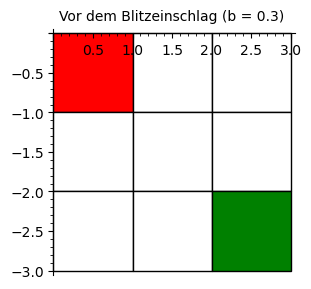

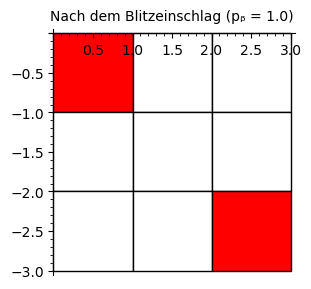

In [9]:

#Startmatrix erstellen & festlegen
A_test = erstelle_startmatrix(3, 3, 0.3)    #Wkt Baumdichte 0.3
show(plot_matrix(A_test), figsize=4, title="Vor dem Blitzeinschlag (b = 0.3)")

#Matrix nach Blitzeinschlag
A_blitz = blitzeinschlag(A_test, pb=1.0, schritt=2)    #Wkt Blitz schlägt ein 1.0 -> sicher
show(plot_matrix(A_blitz), figsize=4, title="Nach dem Blitzeinschlag (pᵦ = 1.0)")

**Vergleich:** Feuerverbreitung mit Blitzeinschlag und ohne Blitzeinschlag:

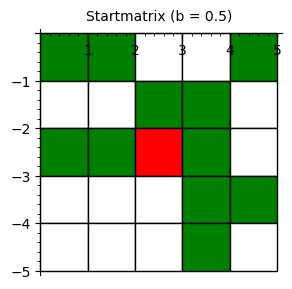

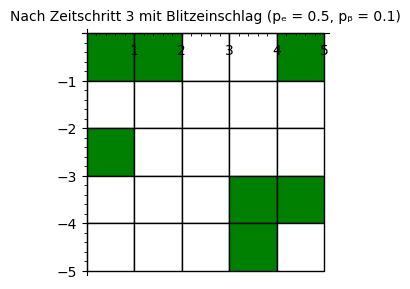

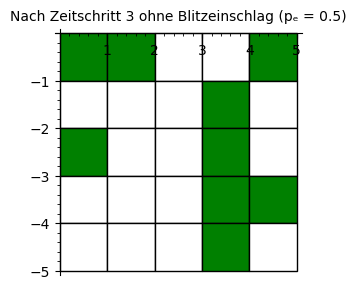

In [10]:
#Vergleich Blitzeinschlag bis Zeitschritt 3
#Wkt festlegen
pe = 0.5   
pb = 0.1   

def simuliere_schritte(A_test, pe, pb, mit_blitz=False):  #Funktion um bis zu Zeitschritt 3 simulieren
    A = Matrix(A_test)  # Kopie der Startmatrix
    
    for schritt in range(1, 4):  #Bis Schritt 3 simulieren
        A = feuer_verbreiten_donut(A, pe)  
        if mit_blitz:
            A = blitzeinschlag(A, pb, schritt)
        
    return A  #Gibt den Zustand nach 5 Schritten zurück

#Startmatrix erstellen & festlegen
A_test = erstelle_startmatrix(5, 5, 0.5)   #Wkt Baumdichte 0.5
show(plot_matrix(A_test), figsize=4, title="Startmatrix (b = 0.5)")

#Matrix mit Blitzeinschlag
A_mit_blitz = simuliere_schritte(A_test, pe, pb, mit_blitz=True)      
show(plot_matrix(A_mit_blitz), figsize=4, title="Nach Zeitschritt 3 mit Blitzeinschlag (pₑ = 0.5, pᵦ = 0.1)")

#Matrix ohne Blitzeinschlag
A_mit_feuer = simuliere_schritte(A_test, pe, pb, mit_blitz=False)
show(plot_matrix(A_mit_feuer), figsize=4, title="Nach Zeitschritt 3 ohne Blitzeinschlag (pₑ = 0.5)") #nur Feuer verbreiten

### Fazit:
Ab Zeitschritt 1 kann jeder Baum mit einer bestimmten Wahrscheinlichkeit pb vom Blitz getroffen werden. Der Blitzeinschlag wird absichtlich erst ab Zeitschritt 1 berücksichtigt, um zu verhindern, dass das Feuer bereits zu Beginn der Simulation durch einen zufälligen Blitz entfacht wird. Auf diese Weise bleibt die Startmatrix in Zeitschritt 0 unverändert und stellt eine klare Ausgangslage für die Simulation dar. Ab diesem Punkt tritt der Blitzeinschlag alle zwei Zeitschritte auf, wobei die Anzahl der Blitze auf maximal 3 pro Schritt begrenzt ist, um die Simulation realistischer zu gestalten.

Diese Funktion fügt der Simulation eine unvorhersehbare und dynamische Komponente hinzu, da der Blitz einen Brand auch dann auslösen kann, wenn das Feuer bereits erloschen ist.    
Für realistische Werte wurde die Obergrenze für die Blitzwarscheinlichkeit im interaktiven Slider auf 0.1 gesetzt, um zu verhindern, dass die Warscheinlichkeit zu hoch wird und die Simulation dadurch unnatürlich erscheint.    
Eine höhere Warscheinlichkeit für den Blitzeinschlag würde die Verbreitung des Feuers dominieren und das natürliche Wachstum des Waldes unterdrücken.
Zur Überprüfung der Funktion wurde ein Testfall mit einer sicheren Warscheinlichkeit pb = 1.0 verwendet, bei dem jeder Baum garantiert vom Blitz getroffen wird.  

Im Vergleich der beiden Szenarien lässt sich deutlich erkennen, dass in der Matrix mit Blitzeinschlägen mehr Bäume Feuer fangen als in der Matrix ohne diese Erweiterung. Dies zeigt, wie der Blitz das bestehende Feuer weiter verstärken und sogar wieder neu entfachen kann, selbst wenn der Brand eigentlich bereits unter Kontrolle war.    
Die Dynamik der Brandausbreitung wird somit unvorhersehbarer, da der Blitz das Feuer jederzeit wieder entfachen kann, was dazu führt, dass sich das Feuer immer weiter ausbreitet und sich weiter fortsetzt. Dadurch wird die Zerstörung in der Simulation dynamischer dargestellt.

Im folgenden wird die Modellerweiterung d) implementiert und a) wird beibehalten

In [11]:
#Funktion neue Bäume wachsen nur alle 5 Zeitschritte
def neuer_baum(A, pn, schritt):
    if schritt % 5 != 0:   #Kein Wachstum, wenn Schritt NICHT durch 5 teilbar ist
        return Matrix(A)   #Originalmatrix zurückgeben, nichts ändern
    
    n, m = A.nrows(), A.ncols()
    A_neu = Matrix(A)
    
    for i in range(n):       #Prüft jede Zelle
        for j in range(m):   
            if A[i, j] == 0 and random.random() < pn:     #Wenn leeres Feld, dann wächst mit Wkt pn ein Baum
                A_neu[i, j] = 2                           
    return A_neu    #Zurückgeben der neuen Matrix 

_simulation = {
    'pn':None,
    'pe':None,
    'pb':None,
    'n':None,
    'm':None,
    'b': None,
    'A0': None,
    'alle_A': []
    }

#Slider / interaktiver Schieberegler
@interact
def simulieren(n=slider(3, 30, 1, default=10, label='Matrixhöhe'), 
               m=slider(3, 30, 1, default=10, label='Matrixbreite'),
               pe=slider(0.2, 0.8, 0.3, default=0.5, label='Wkt pₑ'),
               pb=slider(0.0, 0.1, 0.01, default=0.02, label='Wkt pᵦ'),
               pn=slider(0.05, 0.5, 0.05, default=0.3, label='Wkt pₙ'),
               b=slider(0, 1, 0.05, default=0.5, label='Baumdichte'),
               schritt=slider(0, 20, 1, default=0, label='Zeitschritt')):

    #Überprüfe, ob sich Startparameter geändert haben
    if (_simulation['b'], _simulation['n'], _simulation['m'], _simulation['pn'], _simulation['pb'], _simulation['pe']) != (b, n, m, pn, pb, pe):
        _simulation['b'] = b
        _simulation['n'] = n
        _simulation['m'] = m
        _simulation['pn'] = pn
        _simulation['pb'] = pb
        _simulation['pe'] = pe
        _simulation['A0'] = erstelle_startmatrix(n, m, b)  #Startmatrix mit Dichte b
        _simulation['alle_A'] = [_simulation['A0']]
    

    # Schritte simulieren (ab Schritt 1)
    while len(_simulation['alle_A']) <= schritt:
        schritt_index = len(_simulation['alle_A'])    #Aktueller Simulationsschritt
        alt = _simulation['alle_A'][-1]
        
        neu = feuer_verbreiten_donut(alt, pe)      #Erst Feuer verbreiten
        neu = blitzeinschlag(neu, pb, schritt)              #Dann Blitzeinschlag
        neu = neuer_baum(neu, pn, schritt_index)   #Zuletzt neue Bäume wachsen
        
        _simulation['alle_A'].append(neu)


    A_anzeige = _simulation['alle_A'][schritt]
    show(plot_matrix(A_anzeige), figsize=8, title=f"Zeitschritt {schritt}")

Interactive function <function simulieren at 0x7fdd16ace340> with 7 widgets
  n: TransformIntSlider(value=10, description='Matrixhöhe', max=30, min=3)
  m: TransformIntSlider(value=10, description='Matrixbreite', max=30, min=3)
  pe: TransformFloatSlider(value=0.5, description='Wkt pₑ', max=0.8, min=0.2, step=0.3)
  pb: TransformFloatSlider(value=0.02, description='Wkt pᵦ', max=0.1, step=0.01)
  pn: TransformFloatSlider(value=0.3, description='Wkt pₙ', max=0.5, min=0.05, step=0.05)
  b: TransformFloatSlider(value=0.5, description='Baumdichte', max=1.0, step=0.05)
  schritt: TransformIntSlider(value=0, description='Zeitschritt', max=20)

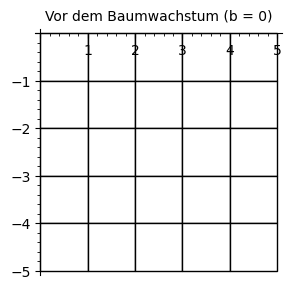

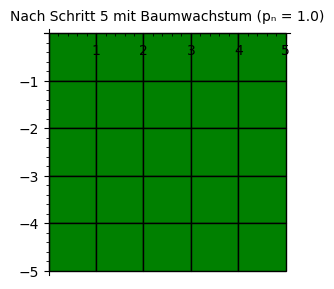

In [12]:
#Testfall Baum wächst mit Sicherheit (pn=1.0) 

#Startmatrix erstellen & festlegen
def baue_leere_testmatrix(n=5, m=5):
    return Matrix(n, m, [0]*(n*m))  # leere Matrix
A_test = baue_leere_testmatrix()

show(plot_matrix(A_test), figsize=4, title="Vor dem Baumwachstum (b = 0)")

#Matrix mit Baumwachstum
A_neuer_baum = neuer_baum(A_test, pn=1.0, schritt=5)  #Wkt Baumwachstum 1.0 -> Bäume wachsen aufjedenfall
show(plot_matrix(A_neuer_baum), figsize=4, title="Nach Schritt 5 mit Baumwachstum (pₙ = 1.0)")

**Vergleich**: mit Baumwachstum und ohne:

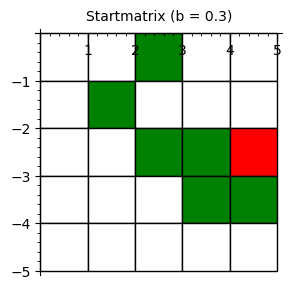

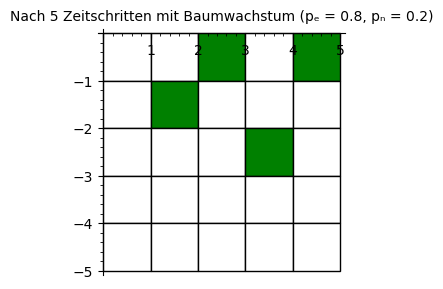

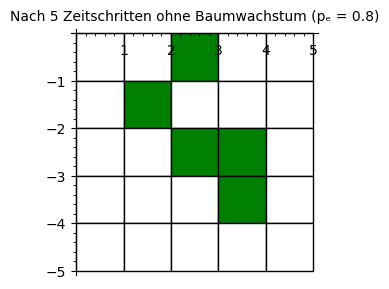

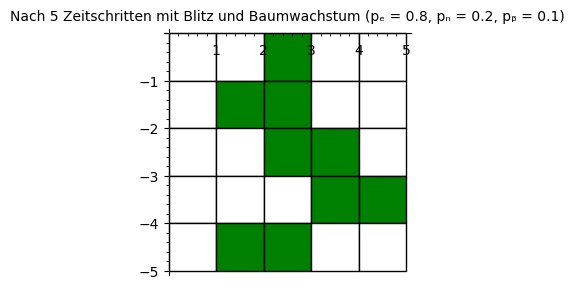

In [13]:
#Vergleich Baumwachstum nach 5 Zeitschritten
#Wkt festlegen
pe = 0.8    
pn = 0.2    
pb = 0.1    

#Schleife um Zustand nach Zeitschritt 5 darzustellen
def simuliere_schritte2(A_start, pe, pn, pb, mit_baumwachstum=False, mit_blitz=False):
    A = Matrix(A_start)  #Kopie der Startmatrix
    
    for schritt in range(1, 6):  #5 Schritte simulieren
        A = feuer_verbreiten_donut(A, pe)  #Feuer verbreitet sich
        if mit_blitz:
            A = blitzeinschlag(A, pb, schritt)
        if mit_baumwachstum:
            A = neuer_baum(A, pn, schritt)  #Baumwachstum nur bei schritt % 5 == 0
        
    return A  #Gibt den Zustand nach 5 Schritten zurück

#Startmatrix erstellen & festlegen
A_test = erstelle_startmatrix(5, 5, 0.3)  #Wkt Baumdicht 0.3
show(plot_matrix(A_test), figsize = 4, title="Startmatrix (b = 0.3)")

#Matrix mit Baumwachstum
A_mit_Baumwachstum = simuliere_schritte2(A_test, pe, pn, pb=0, mit_baumwachstum=True, mit_blitz=False)
show(plot_matrix(A_mit_Baumwachstum), figsize=4, title="Nach 5 Zeitschritten mit Baumwachstum (pₑ = 0.8, pₙ = 0.2)")

#Matrix ohne Baumwachstum
A_normal = simuliere_schritte2(A_test, pe, pn, pb=0, mit_baumwachstum=False, mit_blitz=False)     #Nur Feuer verbreiten
show(plot_matrix(A_normal), figsize=4, title="Nach 5 Zeitschritten ohne Baumwachstum (pₑ = 0.8)")

#Matrix mit Blitzeinschlag und Baumwachstum
A_zsm = simuliere_schritte2(A_test, pe, pn, pb, mit_baumwachstum=True, mit_blitz=True)
show(plot_matrix(A_zsm), figsize=4, title="Nach 5 Zeitschritten mit Blitz und Baumwachstum (pₑ = 0.8, pₙ = 0.2, pᵦ = 0.1)")

### Fazit:
In leeren Zellen können  nach fünf Zeitschritten mit einer Wahrscheinlichkeit pn neue Bäume wachsen, was einen regenerativen Prozess im Wald simuliert, ähnlich wie ein Wald, der sich nach einem Brand langsam erholt.
Diese Funktion tritt erst ab Zeitschritt fünf in Kraft, um den natürlichen Verlauf der Brand- und Regenerationsprozesse zu berücksichtigen.
Um realistische Werte zu gewährleisten, wurde beim interaktiven Slider die Obergrenze für das Baumwachstum auf pn von 0.05 bis 0.5 gesetzt. Dies ermöglicht einen moderaten Baumwachstumsprozess, bei dem die Bäume über mehrere Zeitschritte hinweg wachsen, ohne dass zu viele Bäume in einem sehr kurzen Zeitraum entstehen. Die Wahrscheinlichkeit für Baumwachstum pn kann nicht auf 0 gesetzt werden, da dies bedeuten würde, dass niemals neue Bäume wachsen, was den regenerativen Charakter des Waldes komplett ausschließen würde.

Zur Testung der Funktion wurde ein Testfall mit einer maximalen Warscheinlichkeit von pn = 1.0 verwendet.
Die Veränderungen sind deutlich erkennbar, wenn man die Matrix mit der Warscheinlichkeit pe = 1.0 für das Feuer und pn = 0.3 für das Baumwachstum vergleicht. Dabei entstehen durch das Baumwachstum signifikant mehr Bäume als in der Simulation ohne diese Funktion.

Der Vergleich zeigt, wie sich das System nach fünf Zeitschritten unter verschiedenen bedingungen entwickelt.
Ohne Baumwachstum nimmt die Baumdichte kontinuierlich ab, da sich das Feuer verbreitet, aber keine Erneuerung stattfindet.
Wird der Baumwachstum zugelassen, regenerieren sich vereinzelt leere Zellen, was zu einer langsameren Erholung führt.
In der Kombination mit Blitzeinschlägen entstehen zusätzliche Brandherde, wodurch sich das Feuer unvorhersehbarer und großflächiger ausbreiten kann.

Die beiden Erweiterungen, Baumwachstum und Blitzeinschläge, stehen in einem gewissen Gegensatz zueinander und machen die Simulation dadurch lebendiger und realistischer. Sie simulieren das ständige Wechselspiel zwischen der Erneuerung des Waldes und der Zerstörung durch Feuer. Dieser dynamische Prozess spiegelt die Realität vieler Ökosysteme wider, die sich durch natürliche Brände und Regeneration immer wieder erneuern.

## 8. Zusammungfassung der Ergebnisse

**Aufgabe 1 - Implementierung des Waldbrand-Modells**  
Was? 
Ein lauffähiges Waldbrand-Programm mit variabler Gittergröße  
Wie gelöst? 
Wir erzeugen per erstelle_startmatrix ein nxm-Raster, visualisieren es mit Sage-matrix_plot und lassen die Zustände über feuer_verbreiten nach den Automaton-Regeln springen  

**Aufgabe 2 - Parameterstudie**  
Was?  
Die Ausbreitung bei pe = 0.2 / 0.5 / 0.8 vergleichen  
Wie gelöst? 
Wir simulieren jeden Wert mehrfach, beobachten, dass 0.2 meist verlöscht, 0.8 fast immer durchläuft und 0.5 im Grenzbereich liegt  

**Aufgabe 3 - Statistikfunktion**  
Was? 
Zeitverlauf und Endanteil quantitativ erfassen  
Wie gelöst? 
simuliere_einen_lauf liefert pro Lauf den kumulativen Brandanteil; mittelwertkurve mittelt über R Wiederholungen; endanteil_liste sammelt den Wert nach dem letzten Zeitschritt. Plots zeigen Verlauf (t-Achse) und Endanteil (pe-Achse)  

**Aufgabe 4 - Randbedingungen**  
Was?  
Untersuchen, wie der Rand behandelt wird  
Wie gelöst? 
Wir haben neben dem „harten“ Rand eine Donut-Variante implementiert welche den Endanteil geringfügig vergrößert, weil das Feuer nicht am Gitterrand ausläuft  

**Aufgabe 5 - Modellerweiterungen**  
Was?  
Mindestens zwei Zusatzfeatures integrieren  
Wie gelöst?  
Wir haben  
(a) Blitzeinschlag mit Wahrscheinlichkeit p_b und  
(d) Nachwachsende Bäume mit Wahrscheinlichkeit p_n  
gewählt  
Beide Mechanismen verlängern die Branddauer und verschieben den kritischen pe-Wert etwas nach unten  
  
  
Über alle Versuchsreihen hinweg zeigt das Waldbrand-Modell ein offensichtliches Verhalten. Solange die Brandwahrscheinlichkeit pₑ unter etwa 0,35 liegt, erlöscht das Feuer in den meisten Läufen früh und höchstens ein Fünftel des Waldes brennt ab. Steigt pₑ nur wenig über diesen kritischen Wert, breitet sich das Feuer deutlich schneller aus und erreicht in wenigen Zeitschritten fast das gesamte Gitter (den gesamten Wald). Dieses Verhalten bleibt so, egal ob wir ein 20x20- oder ein 30x30-Gitter verwendeten - was darauf schließen lässt, dass der Auslöser das Verhältnis zwischen Nachbarbrand und Brandwahrscheinlichkeit ist, nicht die Fläche.  
Beim Vergleich statischer und interaktiver Version wurde klar, dass eine Live-Variation von pₑ, Lauflänge T und Wiederholungen R das Verständnis erheblich erleichtert: Mit Schiebereglern lässt sich ganz leicht in Echtzeit sehen, ab welchem pₑ der Wald abbrennt oder wie mehr Wiederholungen das Ergebnis verändern.  
Zusätzliche Randbedingungen oder Erweiterungen (etwa nach wachsende Bäume) verschieben den kritischen Punkt zwar leicht, ändern aber nichts am grundsätzlichen Brandverhalten. Insgesamt illustriert das Modell unserer Meinung nach sehr realistisch, wie kleine Änderungen der Parameter drastische globale Effekte haben.


## 9. Arbeitsaufteilung

Teamübergreifende Aufgaben:
- Aufgabe 1 (Waldbrand-Modell) wurde zum Teil gemeinsam erarbeitet. Dabei hat eine Person den Code geschrieben, eine hat dokumentiert und und die ganze Gruppe hat sich gemeinsam Lösungsanzätze überlegt und ausprobiert.
- Die Interpretation und Plausibilitätschecks der Ergebnisse haben wir ebenfalls zusammen gemacht.

Braun Katharina:
- Überarbeitung und Dokumentierung der gemeinsam bearbeiteten Aufgabe 1 (Waldbrand-Modell)
- Ausarbeitung und Dokumentierung der Aufgabe 2 (Testen der Brandwarscheinlichkeiten)

Kilian Maier:
- Ausarbeitung und Dokumentierung der Aufgabe 3 (Statistikfunktion)
- Konzeption & Dokumentation der Brainstorming-Ergebnisse sowie Gliederung des Berichts

Stenger Caroline:
- Ausarbeitung und Dokumenterung der Aufgabe 4 (Umgang des Rands) & der Aufgabe 5 (Modellerweiterungen)
- Ausformulieren der Quellen


## 10. Quellen
- set_random_seed:
Witty, Carl. 2008. Random Number States. [Online] Sagemath, 2008-03. [Zitat vom 23.04.2025.] https://doc.sagemath.org/html/en/reference/misc/sage/misc/randstate.html

- sliders (Interaktionen auf der Wiki-Seite):
SageWiki. 2021. Sage Interactions. [Online] Sagemath, 2021. [Zitat vom 23.04.2025.] https://wiki.sagemath.org/interact/

- Interact Quickstart:
Sagemath. 2012. Sage Interact Quickstart. [Online] Sagemath, 2012. [Zitat vom 23.04.2025.] https://doc.sagemath.org/html/en/prep/Quickstarts/Interact.html

- Graphics Arrays:
Gourgoulhon, Eric. 2019. Graphics arrays and insets. [Online] Sagemath, 2019. [Zitat vom 30.04.2025]
https://doc.sagemath.org/html/en/reference/plotting/sage/plot/multigraphics.html
